# Data Exploration for NExt dataset. 

## Install AMPL

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gc

In [ ]:
! pip install rdkit-pypi
! pip install deepchem==2.6.1
!pip install --upgrade gspread
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Found existing installation: torch-scatter 2.1.0+pt112cu113
Uninstalling torch-scatter-2.1.0+pt112cu113:
  Successfully uninstalled torch-scatter-2.1.0+pt112cu113
Found existing installation: torch-sparse 0.6.15+pt112cu113
Uninstalling torch-sparse-0.6.15+pt112cu113:
  Successfully uninstalled torch-sparse-0.6.15+pt112cu113
Found existing installation: torch-geometric 2.1.0
Uninstalling torch-geometric-2.1.0:
  Successfully uninstalled torch-geometric-2.1.0
Found existing installation: torch-cluster 1.6.0+pt112cu113
Uninstalling torch-cluster-1.6.0+pt112cu113:
  Successfully uninstalled torch-cluster-1.6.0+pt112cu113
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html
  Using cached https://data.pyg.org/whl/torch-1.12.0%2Bcu113/torch_scatter-2.1.0%2Bpt112cu113-cp37-cp37m-linux_x86_64.whl (8.9 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-w

In [ ]:
import deepchem
# print(deepchem.__version__)
! pip install umap
! pip install llvmlite
! pip install umap-learn
! pip install molvs
! pip install bravado

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import deepchem as dc

# get the Install AMPL_GPU_test.sh
!wget 'https://raw.githubusercontent.com/ATOMScience-org/AMPL/master/atomsci/ddm/examples/tutorials/config/install_AMPL_GPU_test.sh'

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

--2022-11-30 20:15:41--  https://raw.githubusercontent.com/ATOMScience-org/AMPL/master/atomsci/ddm/examples/tutorials/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179 [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh.1’

install_AMPL_GPU_te 100%[===================>]     179  --.-KB/s    in 0s      

2022-11-30 20:15:42 (8.32 MB/s) - ‘install_AMPL_GPU_test.sh.1’ saved [179/179]

mkdir: cannot create directory ‘github’: File exists
fatal: destination path 'AMPL' already exists and is not an empty directory.
Already on 'master'
Your branch is up to date with 'origin/master'.
running build
running build_py
Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
Generating grammar tables from /usr/lib/python3.7/li

## Exploring relationship between docking score and smile
## Data source = AMPC

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import json
import requests
import sys

In [ ]:
# Import AMPL libraries
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
import atomsci.ddm.pipeline.model_pipeline as mp
import atomsci.ddm.pipeline.parameter_parser as parse
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.utils.struct_utils as struct_utils
from atomsci.ddm.pipeline import perf_plots as pp
# Additional python libraries
import pandas as pd
import numpy as np
import getpass, os

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
os.chdir('drive/MyDrive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Formation

In [ ]:
df_sp = pd.read_csv('diversity_3500_scores.txt',sep=' ',header=None)
df_sp.columns=['compound_id','smiles','score']

In [ ]:
df_sp.head()

,compound_id,smiles,score
0,2579982,COC(=O)CCC(C)C1CCC2C3CCC4C[C@@H](CCC4(C)C3CC(=...,-7.223
1,2505256,CC(=O)O[C@H]1[C@H](C[C@H]2[C@@H]3CC[C@H]4C[C@H...,-6.982
2,2579969,C[C@]12CCC3C(CCC4CCCC[C@]34C)C1CCC2N,-6.809
3,2552946,COC(=O)c1sccc1NC(=O)CCC(O)=O,-5.096
4,2523997,COC(=O)c1sccc1NC(=O)CC1(CCCCCC1)C(O)=O,-4.741


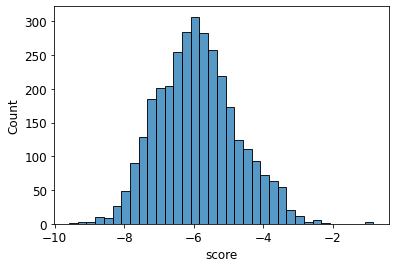

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()

sns.histplot(data=df_sp, x="score", binwidth=0.25)

In [ ]:
df_sp['rdkit_smiles'] = df_sp['smiles'].apply(curate_data.base_smiles_from_smiles)

In [ ]:
# look at length of dataset and duplicates.
print('Name duplicates:', df_sp['compound_id'].duplicated().sum())
print('SMILES duplicates:', df_sp['rdkit_smiles'].duplicated().sum())
print('Shape:',df_sp.shape)
# no duplicate

Name duplicates: 43
SMILES duplicates: 43
Shape: (3254, 4)


In [ ]:
# curate data
def curate(df):
# column: Response values column
  column = 'score'

# tolerance: Percentage of individual respsonse values allowed to different from 
# the average to be included in averaging
  tolerance = 5

# list_bad_duplicates: Print structures with bad duplicates
  list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
  max_std = 0.5

# compound_id: Compound ID column
  compound_id = 'compound_id'

# smiles_col: SMILES column
  smiles_col = 'rdkit_smiles'

# column that will be averaged ; smiles_col; used to find the replicates
# 

  curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       df, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)
  return curated_df


In [ ]:
curated_df=curate(df_sp)
curated_df.head(10)

,compound_id,smiles,score,rdkit_smiles,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,2579982,COC(=O)CCC(C)C1CCC2C3CCC4C[C@@H](CCC4(C)C3CC(=...,-7.223,COC(=O)CCC(C)C1CCC2C3CCC4C[C@H](OC(=O)c5ccccc5...,-7.223,NaN,-0.0,0
1,2505256,CC(=O)O[C@H]1[C@H](C[C@H]2[C@@H]3CC[C@H]4C[C@H...,-6.982,CC(=O)O[C@H]1C[C@@H]2CC[C@@H]3[C@H](CC[C@@]4(C...,-6.982,NaN,-0.0,0
2,2579969,C[C@]12CCC3C(CCC4CCCC[C@]34C)C1CCC2N,-6.809,C[C@]12CCCCC1CCC1C2CC[C@]2(C)C(N)CCC12,-6.809,NaN,-0.0,0
3,2552946,COC(=O)c1sccc1NC(=O)CCC(O)=O,-5.096,COC(=O)c1sccc1NC(=O)CCC(=O)O,-5.096,NaN,-0.0,0
4,2523997,COC(=O)c1sccc1NC(=O)CC1(CCCCCC1)C(O)=O,-4.741,COC(=O)c1sccc1NC(=O)CC1(C(=O)O)CCCCCC1,-4.741,NaN,-0.0,0
5,2527051,Cc1ccccc1NC(=O)CC1(CCCCC1)C(O)=O,-5.608,Cc1ccccc1NC(=O)CC1(C(=O)O)CCCCC1,-5.608,NaN,-0.0,0
6,2560429,CC(=C)CC1(CCCCC1)Nc1ccccc1C,-6.644,C=C(C)CC1(Nc2ccccc2C)CCCCC1,-6.644,NaN,-0.0,0
7,2559454,CC(C)(C)c1ccccc1NC(=O)CCC(O)=O,-6.057,CC(C)(C)c1ccccc1NC(=O)CCC(=O)O,-6.057,NaN,-0.0,0
8,2534103,Cc1ccccc1NC(=O)COC(=O)COc1ccccc1,-4.523,Cc1ccccc1NC(=O)COC(=O)COc1ccccc1,-4.523,NaN,-0.0,0
9,2561037,CC(=O)NN=C(S)Nc1ccccc1C(F)(F)F,-6.699,CC(=O)NN=C(S)Nc1ccccc1C(F)(F)F,-6.699,NaN,-0.0,0


In [ ]:
curated_df.shape

(3210, 8)

In [ ]:
curated_df.describe()

,compound_id,score,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
count,3.210000e+03,3210.000000,3210.000000,40.000000,3210.000000,3210.0
mean,2.547635e+06,-5.894270,-5.893840,0.088699,-0.012291,0.0
std,2.679997e+04,1.145446,1.145361,0.102710,0.168853,0.0
min,2.500006e+06,-9.587000,-9.587000,0.001414,-4.922454,0.0
25%,2.521037e+06,-6.701000,-6.701000,0.014496,0.000000,0.0
50%,2.559901e+06,-5.957000,-5.956500,0.048790,-0.000000,0.0
75%,2.567223e+06,-5.177000,-5.177000,0.115258,-0.000000,0.0
max,2.583860e+06,-0.900000,-0.900000,0.412950,-0.000000,0.0


In [ ]:
# split
df_test=curated_df.iloc[3000:3210,:]
curated_df=curated_df.iloc[:3000,:]

## Diversity Plot

In [ ]:
curated_df['rank'] = curated_df['score'].rank(ascending=True)
curated_df.to_csv('diversity_3500_scores_curated.csv')

Canonicalizing 3210 molecules...
Done
Computing fingerprints...
Done
Computing Tanimoto distance matrix...
Done


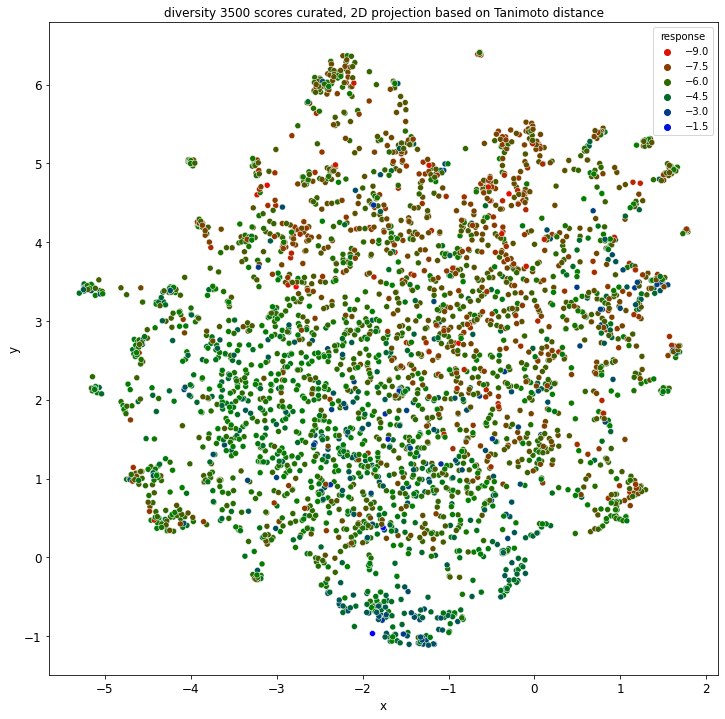

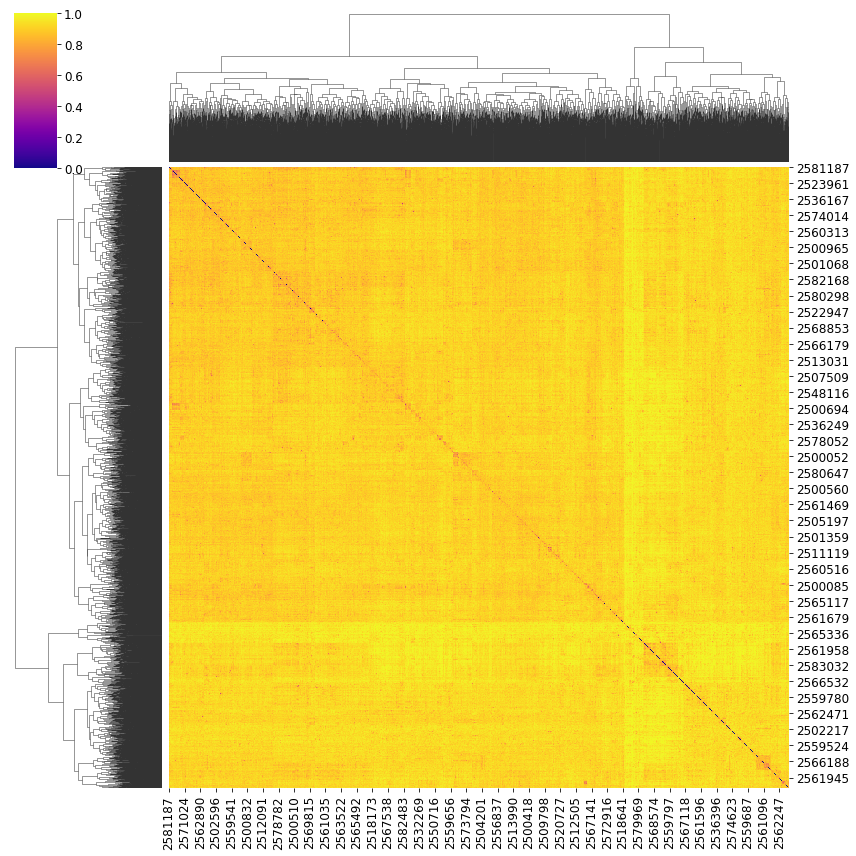

In [ ]:
dp.diversity_plots(dset_key = 'diversity_3500_scores_curated.csv',
                   datastore = False,
                   response_col = 'score',
                   max_for_mcs = 100)

## Self Similarity 

In [ ]:
feat_type = 'ECFP'
dist_metric = 'tanimoto'
smiles_lst1 = curated_df['rdkit_smiles'].tolist()
calc_type = 'nearest'
dist_sample = cd.calc_dist_smiles(feat_type, dist_metric, smiles_lst1, None, calc_type)
print(dist_sample[0:9])

[0.72       0.73239437 0.73239437 0.41666667 0.41666667 0.42857143
 0.53191489 0.55555556 0.55102041]


,dist,subset
0,0.720000,all
1,0.732394,all
2,0.732394,all
3,0.416667,all
4,0.416667,all
...,...,...
3205,0.700000,all
3206,0.719298,all
3207,0.750000,all
3208,0.690141,all


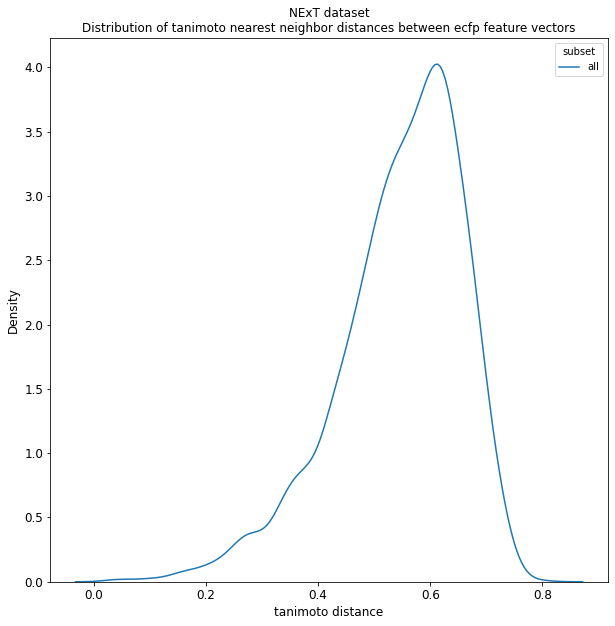

In [ ]:
dp.plot_tani_dist_distr(curated_df, smiles_col='rdkit_smiles', df_name='NExT', plot_width=10)

Above plot is the distribution of tanimoto nearest nerighbor distance between ecfp feature vectors. 

## Visualization of Molecules

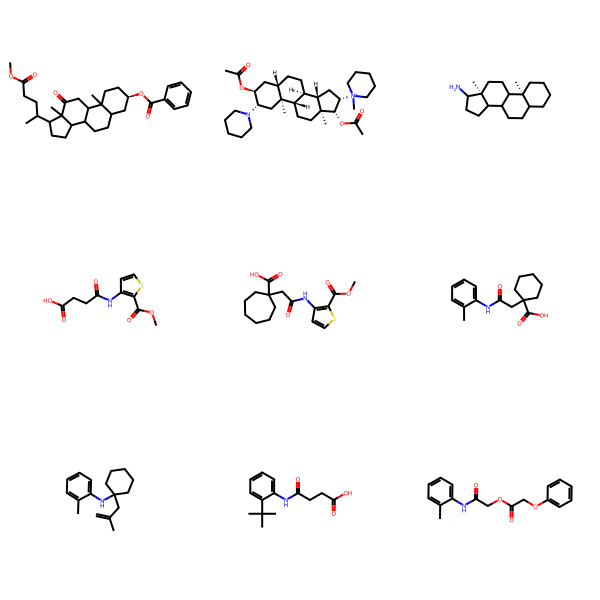

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from itertools import islice

molecules = [Chem.MolFromSmiles(smiles) for smiles in islice(df_sp['smiles'], 9)]

Draw.MolsToGridImage(molecules)

# Modeling with diversity_3500_scores

In [ ]:
!pip install --upgrade gspread
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Prediction on scores

In [ ]:
response_cols = ['VALUE_NUM_mean']
dataset_key = 'diversity_3500_scores_curated.csv'
params1={"datastore": "False",
        "save_results": "False",
        "splitter": "scaffold",
        "id_col": 'compound_id',
        "smiles_col": 'rdkit_smiles',
        "response_cols": response_cols,
        "system": "LC",
        "transformers": "True",
        "model_type": "NN",
        "prediction_type": "regression",
        "featurizer": "graphconv",
        "descriptor_type": "graphconv",
        "learning_rate": "0.001057",
        "layer_sizes": "64,64,32",
        "dropouts" : "0.4,0.4,0.4",
        "save_results": "False",
        "max_epochs": "50",
        "verbose": "True",
        "split_valid_frac": 0.15,
        "split_test_frac": 0.15,
        "result_dir": 'drive/MyDrive/Colab Notebooks',
        "dataset_key": dataset_key}
tp1 = parse.wrapper(params1)
NN1 = mp.ModelPipeline(tp1)
NN1.train_model()

INFO:ATOM:Created a dataset hash '38d1bd2113a7a6e08d7aaf464e4fb56f' from dataset_key '/content/drive/MyDrive/Colab Notebooks/diversity_3500_scores_curated.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset diversity_3500_scores_curated, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/diversity_3500_scores_curated/NN_graphconv_scaffold_regression/76997edd-7ba6-4161-8e89-c06c4fac7db0/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is -0.996
INFO:ATOM:Epoch 0: training r2_score = -1.353, validation r2_score = -0.996, test r2_score = -1.172
INFO:ATOM:*** Total score for epoch 1 is 0.0791, is new maximum
INFO:ATOM:Epoch 1: training r2_score = 0.106, validation r2_score = 0.079, test r2_score = 0.060
INFO:ATOM:Epoch 2: training r2_score = 0.177, validation r2_score = -0.158, test r2_score = 0.010
INFO:ATOM:Epoch 3: training r2_score = 0.125, validation r2_score = -0.303, test r2_score = -0.094
INFO:ATOM:Epoch 4: training r2_score = 0.067, validation r2_score = -0.454, test r2_score = -0.208
INFO:ATOM:Epoch 5: training r2_score = -0.027, validation r2_score = -0.596, test r2_score = -0.296
INFO:ATOM

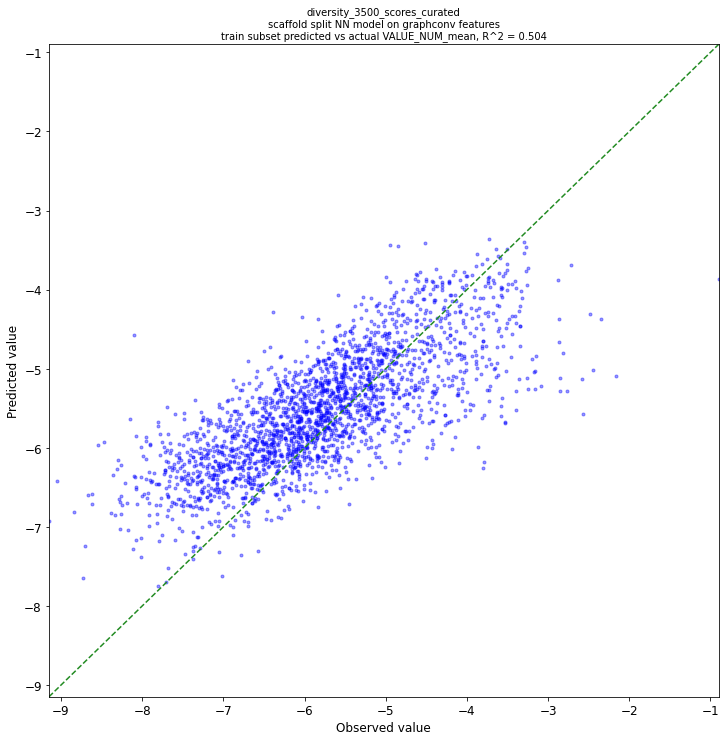

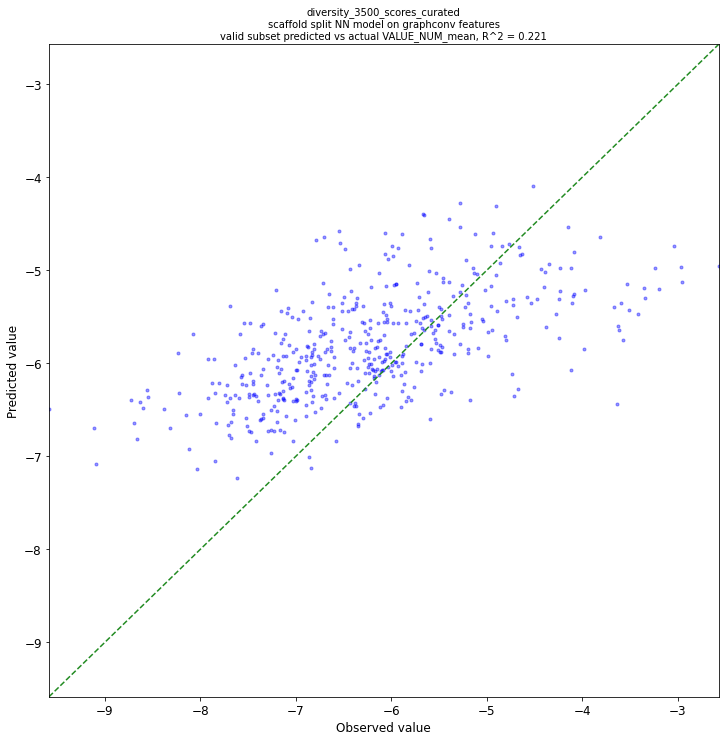

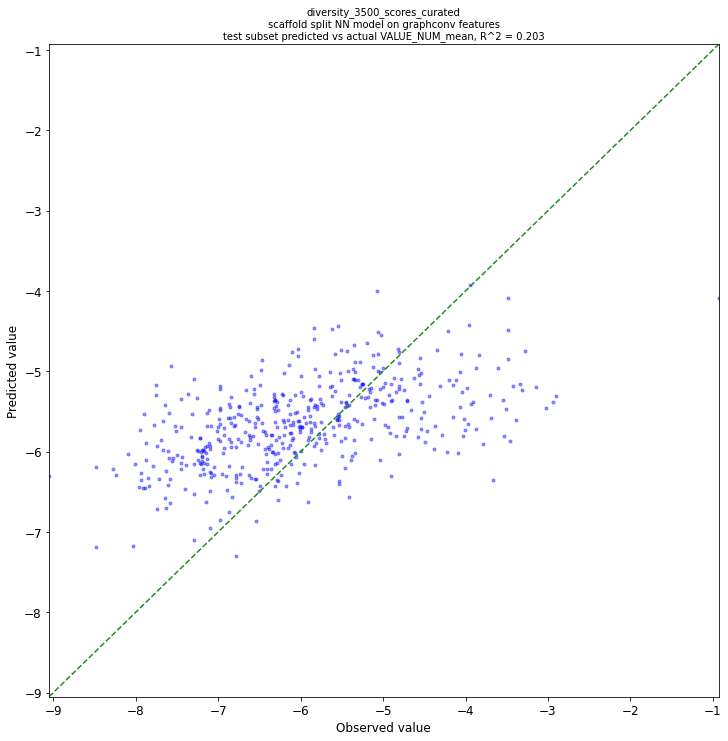

In [ ]:
pp.plot_pred_vs_actual(NN1)

## Metrics

In [ ]:
#df_test = pd.read_csv('NExT_scores_3000.txt',sep=' ',header=None)
#df_test.columns=['compound_id','smiles','score']
#df_test = df_test.dropna(axis=0,how='any')
#df_test['rdkit_smiles'] = df_test['smiles'].apply(curate_data.base_smiles_from_smiles)
#df_test_curated=curate(df_test)
df_test['rank'] = df_test['score'].rank(ascending=True)

In [ ]:
test_result = NN1.predict_on_dataframe(df_test, contains_responses=True)

INFO:ATOM:Featurizing sample 0
INFO:ATOM:Transforming response data
INFO:ATOM:Predicting values for current model


number of features: 75


In [ ]:
test_result

,compound_id,rdkit_smiles,actual,pred
0,2562075,Cc1cc(C)[n+](C)n1-c1ccccc1,-5.192,-5.817001
1,2560230,Cc1ccc(-c2cc3c4ccccc4ccn3c2)cc1,-7.302,-6.364294
2,2574560,CNc1cccc(Cl)c1Cl,-4.643,-6.294569
3,2503175,COc1cc2c(cc1OC)C(C(=O)NCCN1CCOCC1)C1c3ccccc3CC...,-6.748,-6.170160
4,2544088,CC1=C(C(N)=O)C(c2cccs2)n2nc(-c3cccc(Cl)c3)nc2N1,-7.765,-6.563765
...,...,...,...,...
205,2523934,Cc1ccc(SCCC(=O)OCc2cc(C#N)ccc2F)cc1,-4.961,-6.027173
206,2579253,CC(C)(C)C(=O)C1C(C(C)(C)C)=CC(c2ccccc2)=CC1(C)...,-7.030,-6.411511
207,2578779,CC(C)(C)C(N)CN,-3.898,-5.472612
208,2557109,CCc1c(C)sc2nc(N(CC)CCO)n3nc(-c4ccccc4)nc3c12,-6.235,-6.526530


In [ ]:
from sklearn import metrics
print('r2_score',metrics.r2_score(test_result['actual'],test_result['pred']))

r2_score 0.1633645803643189


In [ ]:
from sklearn import metrics
def active(ls,percentage=0.04,n=0):
     total=len(ls)
     ls=ls.rank(ascending=True)
     if n==0:
        newls=np.where(ls<=total*percentage,1,0)
     else:
        newls=np.where(ls<=n,1,0)
     return newls

In [ ]:
y_true=test_result['actual']
y_true=active(y_true)
y_pred=test_result['pred']
y_pred=active(y_pred)

In [ ]:
print("accuracy_score:", metrics.accuracy_score(y_true, y_pred))
print("precision_score:", metrics.precision_score(y_true, y_pred))
print("recall_score:", metrics.recall_score(y_true, y_pred))
print("f1_score:", metrics.f1_score(y_true, y_pred))
print("auc_roc:", metrics.roc_auc_score(y_true, y_pred))

accuracy_score: 0.9428571428571428
precision_score: 0.25
recall_score: 0.25
f1_score: 0.25
auc_roc: 0.6101485148514851


## Classification

In [ ]:
df=pd.read_csv(dataset_key)
df['rank'] = df['score'].rank(ascending=True)
def change(df,percentage=0.04):
     n=len(df)
     df['active']=np.where(df['rank']<=n*percentage,1,0)
     return df
df=change(df)
df.to_csv('cf_'+dataset_key)
df_test_curated=change(df_test)

In [ ]:
response_cols_cf=['active']
dataset_key_cf = 'cf_diversity_3500_scores_curated.csv'
params2={"datastore": "False",
        "save_results": "False",
        "splitter": "stratified",
        "id_col": 'compound_id',
        "smiles_col": 'rdkit_smiles',
        "response_cols": response_cols_cf,
        "system": "LC",
        "transformers": "True",
        "model_type": "NN",
        "prediction_type": "classification",
        "featurizer": "graphconv",
        "descriptor_type": "graphconv",
        "learning_rate": "0.001057",
        "layer_sizes": "64,64,32",
        "dropouts" : "0.4,0.4,0.4",
        "save_results": "False",
        "max_epochs": "50",
        "verbose": "True",
        "split_valid_frac": 0.15,
        "split_test_frac": 0.15,
        "result_dir": 'drive/MyDrive/Colab Notebooks',
        "dataset_key": dataset_key_cf}
tp2 = parse.wrapper(params2)
NN2 = mp.ModelPipeline(tp2)
NN2.train_model()

INFO:ATOM:Created a dataset hash '304b24b5e01e7c8026cf7ed11acf1819' from dataset_key '/content/drive/MyDrive/Colab Notebooks/cf_diversity_3500_scores_curated.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset cf_diversity_3500_scores_curated, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000


Number of features: 75


INFO:ATOM:Total score for epoch 0 is 0.449
INFO:ATOM:Epoch 0: training roc_auc_score = 0.489, validation roc_auc_score = 0.449, test roc_auc_score = 0.550
INFO:ATOM:*** Total score for epoch 1 is 0.454, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.599, validation roc_auc_score = 0.454, test roc_auc_score = 0.719
INFO:ATOM:*** Total score for epoch 2 is 0.572, is new maximum
INFO:ATOM:Epoch 2: training roc_auc_score = 0.691, validation roc_auc_score = 0.572, test roc_auc_score = 0.779
INFO:ATOM:Epoch 3: training roc_auc_score = 0.691, validation roc_auc_score = 0.558, test roc_auc_score = 0.722
INFO:ATOM:*** Total score for epoch 4 is 0.583, is new maximum
INFO:ATOM:Epoch 4: training roc_auc_score = 0.732, validation roc_auc_score = 0.583, test roc_auc_score = 0.833
INFO:ATOM:*** Total score for epoch 5 is 0.66, is new maximum
INFO:ATOM:Epoch 5: training roc_auc_score = 0.769, validation roc_auc_score = 0.660, test roc_auc_score = 0.877
INFO:ATOM:Epoch 6: training roc_au

In [ ]:
test_result = NN2.predict_on_dataframe(df_test_curated, contains_responses=True)

INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000


number of features: 75


INFO:ATOM:Predicting values for current model


In [ ]:
from sklearn import metrics
y_true=test_result['actual']
y_pred=test_result['pred']
print("accuracy_score:", metrics.accuracy_score(y_true, y_pred))
print("precision_score:", metrics.precision_score(y_true, y_pred))
print("recall_score:", metrics.recall_score(y_true, y_pred))
print("f1_score:", metrics.f1_score(y_true, y_pred))

accuracy_score: 0.9890675241157556
precision_score: 0.0
recall_score: 0.0
f1_score: 0.0


### Handel imbalance

In [ ]:
import pandas as pd
import tempfile

import atomsci.ddm.pipeline.parameter_parser as parse
import atomsci.ddm.pipeline.model_pipeline as mp

import logging
logger = logging.getLogger(__name__)

nreps = 10
metrics = []
vals = []
balanced = []
subset = []

def test_balancing_transformer(dset_key):
    dset_df = pd.read_csv(dset_key)

    res_dir = 'drive/MyDrive/Colab Notebooks'
    split_uuid = create_scaffold_split(dset_key, res_dir)

    # train the model without the balancing
    train_model_wo_balan(dset_key, split_uuid, res_dir)
    # train the model with the balancing parameter
    train_model_w_balan(dset_key, split_uuid, res_dir)

    metrics_df = pd.DataFrame(dict(subset=subset, balanced=balanced, metric=metrics, val=vals))

    # check the recall_score
    rec_df = metrics_df[metrics_df.metric == 'recall_score']

    not_balanced_series = rec_df[(rec_df.balanced == 'no')].groupby("subset").val.mean()
    balanced_series = rec_df[(rec_df.balanced == 'yes')].groupby("subset").val.mean()

    assert((balanced_series['test'] > not_balanced_series['test']) & (balanced_series['valid'] > not_balanced_series['valid']) )
def create_scaffold_split(dset_key, res_dir):
    params = {
        "dataset_key" : dset_key,
        "datastore" : "False",
        "uncertainty": "False",
        "splitter": "scaffold",
        "split_valid_frac": "0.15",
        "split_test_frac": "0.05",
        "split_strategy": "train_valid_test",
        "previously_split": "False",
        "prediction_type": "classification",
        "model_choice_score_type": "roc_auc",
        "response_cols" : "active",
        "id_col": "compound_id",
        "smiles_col" : "rdkit_smiles",
        "result_dir": res_dir,
        "system": "LC",
        "transformers": "True",
        "model_type": "NN",
        "featurizer": "graphconv",
        "descriptor_type": "graphconv",
        "learning_rate": ".0007",
        "layer_sizes": "64,64,32",
        "dropouts": "0.3,0.3,0.3",
        "save_results": "False",
        "max_epochs": "50",
        "verbose": "False"
    }

    pparams = parse.wrapper(params)
    MP = mp.ModelPipeline(pparams)

    split_uuid = MP.split_dataset()
    return split_uuid

def train_model_wo_balan(dset_key, split_uuid, res_dir):
    # Train classification models without balancing weights. Repeat this several times so we can get some statistics on the performance metrics.
    params = {
        "dataset_key" : dset_key,
        "datastore" : "False",
        "uncertainty": "False",
        "splitter": "scaffold",
        "split_valid_frac": "0.1",
        "split_test_frac": "0.1",
        "split_strategy": "train_valid_test",
        "previously_split": "True",
        "split_uuid": split_uuid,
        "prediction_type": "classification",
        "model_choice_score_type": "roc_auc",
        "response_cols" : "active",
        "id_col": "compound_id",
        "smiles_col" : "rdkit_smiles",
        "result_dir": res_dir,
        "system": "LC",
        "transformers": "True",
        "model_type": "NN",
        "featurizer": "graphconv",
        "descriptor_type": "graphconv",
        "learning_rate": ".0007",
        "layer_sizes": "64,64,32",
        "dropouts": "0.3,0.3,0.3",
        "save_results": "False",
        "max_epochs": "50",
        "verbose": "False"
    }

    for i in range(nreps):
        pparams = parse.wrapper(params)
        MP = mp.ModelPipeline(pparams)
        MP.train_model()
        wrapper = MP.model_wrapper

        for ss in ['valid', 'test']:
            metvals = wrapper.get_pred_results(ss, 'best')
            for metric in ['roc_auc_score', 'prc_auc_score', 'cross_entropy', 'precision', 'recall_score', 'npv', 'accuracy_score', 'bal_accuracy', 'kappa','matthews_cc']:
                subset.append(ss)
                balanced.append('no')
                metrics.append(metric)
                vals.append(metvals[metric])

def train_model_w_balan(dset_key, split_uuid, res_dir):
    # Now train models on the same dataset with balancing weights
    params = {
        "dataset_key" : dset_key,
        "datastore" : "False",
        "uncertainty": "False",
        "splitter": "scaffold",
        "split_valid_frac": "0.1",
        "split_test_frac": "0.1",
        "split_strategy": "train_valid_test",
        "previously_split": "True",
        "split_uuid": split_uuid,
        "prediction_type": "classification",
        "model_choice_score_type": "roc_auc",
        "response_cols" : "active",
        "id_col": "compound_id",
        "smiles_col" : "rdkit_smiles",
        "result_dir": res_dir,
        "system": "LC",
        "transformers": "True",
        "model_type": "NN",
        "featurizer": "graphconv",
        "descriptor_type": "graphconv",
        "weight_transform_type": "balancing",
        "learning_rate": ".0007",
        "layer_sizes": "64,64,32",
        "dropouts": "0.3,0.3,0.3",
        "save_results": "False",
        "max_epochs": "50",
        "verbose": "False"
    }

    for i in range(nreps):
        pparams = parse.wrapper(params)
        MP = mp.ModelPipeline(pparams)
        MP.train_model()
        wrapper = MP.model_wrapper

        for ss in ['valid', 'test']:
            metvals = wrapper.get_pred_results(ss, 'best')
            for metric in ['roc_auc_score', 'prc_auc_score', 'cross_entropy', 'precision', 'recall_score', 'npv', 'accuracy_score', 'bal_accuracy', 'kappa','matthews_cc']:
                subset.append(ss)
                balanced.append('yes')
                metrics.append(metric)
                vals.append(metvals[metric])

In [ ]:
test_balancing_transformer(dataset_key_cf)

INFO:ATOM:Created a dataset hash '84826ecf7f2e77f3aca3ad7771ca17df' from dataset_key '/content/drive/MyDrive/Colab Notebooks/cf_diversity_3500_scores_curated.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset cf_diversity_3500_scores_curated, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000


Number of features: 75


INFO:ATOM:Created a dataset hash '84826ecf7f2e77f3aca3ad7771ca17df' from dataset_key '/content/drive/MyDrive/Colab Notebooks/cf_diversity_3500_scores_curated.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset cf_diversity_3500_scores_curated, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000


Number of features: 75


INFO:ATOM:Total score for epoch 0 is 0.646
INFO:ATOM:Epoch 0: training roc_auc_score = 0.588, validation roc_auc_score = 0.646, test roc_auc_score = 0.869
INFO:ATOM:Epoch 1: training roc_auc_score = 0.592, validation roc_auc_score = 0.621, test roc_auc_score = 0.938
INFO:ATOM:Epoch 2: training roc_auc_score = 0.686, validation roc_auc_score = 0.607, test roc_auc_score = 0.969
INFO:ATOM:Epoch 3: training roc_auc_score = 0.699, validation roc_auc_score = 0.563, test roc_auc_score = 0.950
INFO:ATOM:Epoch 4: training roc_auc_score = 0.694, validation roc_auc_score = 0.628, test roc_auc_score = 0.981
INFO:ATOM:*** Total score for epoch 5 is 0.726, is new maximum
INFO:ATOM:Epoch 5: training roc_auc_score = 0.721, validation roc_auc_score = 0.726, test roc_auc_score = 0.950
INFO:ATOM:*** Total score for epoch 6 is 0.755, is new maximum
INFO:ATOM:Epoch 6: training roc_auc_score = 0.767, validation roc_auc_score = 0.755, test roc_auc_score = 0.838
INFO:ATOM:*** Total score for epoch 7 is 0.777,

Number of features: 75


INFO:ATOM:Total score for epoch 0 is 0.628
INFO:ATOM:Epoch 0: training roc_auc_score = 0.765, validation roc_auc_score = 0.628, test roc_auc_score = 0.863
INFO:ATOM:*** Total score for epoch 1 is 0.746, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.768, validation roc_auc_score = 0.746, test roc_auc_score = 0.994
INFO:ATOM:*** Total score for epoch 2 is 0.77, is new maximum
INFO:ATOM:Epoch 2: training roc_auc_score = 0.749, validation roc_auc_score = 0.770, test roc_auc_score = 0.975
INFO:ATOM:Epoch 3: training roc_auc_score = 0.716, validation roc_auc_score = 0.730, test roc_auc_score = 0.981
INFO:ATOM:Epoch 4: training roc_auc_score = 0.755, validation roc_auc_score = 0.753, test roc_auc_score = 0.963
INFO:ATOM:Epoch 5: training roc_auc_score = 0.767, validation roc_auc_score = 0.762, test roc_auc_score = 0.919
INFO:ATOM:*** Total score for epoch 6 is 0.777, is new maximum
INFO:ATOM:Epoch 6: training roc_auc_score = 0.788, validation roc_auc_score = 0.777, test roc_auc

Number of features: 75


INFO:ATOM:Total score for epoch 0 is 0.455
INFO:ATOM:Epoch 0: training roc_auc_score = 0.524, validation roc_auc_score = 0.455, test roc_auc_score = 0.706
INFO:ATOM:Epoch 1: training roc_auc_score = 0.445, validation roc_auc_score = 0.156, test roc_auc_score = 0.806
INFO:ATOM:Epoch 2: training roc_auc_score = 0.495, validation roc_auc_score = 0.220, test roc_auc_score = 0.981
INFO:ATOM:Epoch 3: training roc_auc_score = 0.560, validation roc_auc_score = 0.274, test roc_auc_score = 0.988
INFO:ATOM:Epoch 4: training roc_auc_score = 0.512, validation roc_auc_score = 0.259, test roc_auc_score = 0.850
INFO:ATOM:Epoch 5: training roc_auc_score = 0.611, validation roc_auc_score = 0.371, test roc_auc_score = 0.925
INFO:ATOM:*** Total score for epoch 6 is 0.498, is new maximum
INFO:ATOM:Epoch 6: training roc_auc_score = 0.740, validation roc_auc_score = 0.498, test roc_auc_score = 0.988
INFO:ATOM:*** Total score for epoch 7 is 0.601, is new maximum
INFO:ATOM:Epoch 7: training roc_auc_score = 0.8

Number of features: 75


INFO:ATOM:Total score for epoch 0 is 0.558
INFO:ATOM:Epoch 0: training roc_auc_score = 0.710, validation roc_auc_score = 0.558, test roc_auc_score = 0.944
INFO:ATOM:*** Total score for epoch 1 is 0.655, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.647, validation roc_auc_score = 0.655, test roc_auc_score = 0.419
INFO:ATOM:*** Total score for epoch 2 is 0.687, is new maximum
INFO:ATOM:Epoch 2: training roc_auc_score = 0.645, validation roc_auc_score = 0.687, test roc_auc_score = 0.506
INFO:ATOM:*** Total score for epoch 3 is 0.749, is new maximum
INFO:ATOM:Epoch 3: training roc_auc_score = 0.621, validation roc_auc_score = 0.749, test roc_auc_score = 0.512
INFO:ATOM:Epoch 4: training roc_auc_score = 0.701, validation roc_auc_score = 0.686, test roc_auc_score = 0.494
INFO:ATOM:Epoch 5: training roc_auc_score = 0.699, validation roc_auc_score = 0.672, test roc_auc_score = 0.613
INFO:ATOM:Epoch 6: training roc_auc_score = 0.745, validation roc_auc_score = 0.599, test roc_au

Number of features: 75


INFO:ATOM:Total score for epoch 0 is 0.455
INFO:ATOM:Epoch 0: training roc_auc_score = 0.412, validation roc_auc_score = 0.455, test roc_auc_score = 0.688
INFO:ATOM:Epoch 1: training roc_auc_score = 0.370, validation roc_auc_score = 0.394, test roc_auc_score = 0.994
INFO:ATOM:Epoch 2: training roc_auc_score = 0.451, validation roc_auc_score = 0.312, test roc_auc_score = 1.000
INFO:ATOM:Epoch 3: training roc_auc_score = 0.402, validation roc_auc_score = 0.300, test roc_auc_score = 1.000
INFO:ATOM:Epoch 4: training roc_auc_score = 0.509, validation roc_auc_score = 0.363, test roc_auc_score = 1.000
INFO:ATOM:*** Total score for epoch 5 is 0.501, is new maximum
INFO:ATOM:Epoch 5: training roc_auc_score = 0.619, validation roc_auc_score = 0.501, test roc_auc_score = 1.000
INFO:ATOM:Epoch 6: training roc_auc_score = 0.642, validation roc_auc_score = 0.442, test roc_auc_score = 1.000
INFO:ATOM:Epoch 7: training roc_auc_score = 0.680, validation roc_auc_score = 0.465, test roc_auc_score = 1.00

Number of features: 75


INFO:ATOM:Total score for epoch 0 is 0.475
INFO:ATOM:Epoch 0: training roc_auc_score = 0.618, validation roc_auc_score = 0.475, test roc_auc_score = 0.100
INFO:ATOM:*** Total score for epoch 1 is 0.631, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.680, validation roc_auc_score = 0.631, test roc_auc_score = 0.588
INFO:ATOM:Epoch 2: training roc_auc_score = 0.736, validation roc_auc_score = 0.601, test roc_auc_score = 0.863
INFO:ATOM:*** Total score for epoch 3 is 0.668, is new maximum
INFO:ATOM:Epoch 3: training roc_auc_score = 0.741, validation roc_auc_score = 0.668, test roc_auc_score = 0.919
INFO:ATOM:*** Total score for epoch 4 is 0.7, is new maximum
INFO:ATOM:Epoch 4: training roc_auc_score = 0.760, validation roc_auc_score = 0.700, test roc_auc_score = 0.912
INFO:ATOM:Epoch 5: training roc_auc_score = 0.770, validation roc_auc_score = 0.647, test roc_auc_score = 0.900
INFO:ATOM:Epoch 6: training roc_auc_score = 0.798, validation roc_auc_score = 0.657, test roc_auc_

Number of features: 75


INFO:ATOM:Total score for epoch 0 is 0.588
INFO:ATOM:Epoch 0: training roc_auc_score = 0.539, validation roc_auc_score = 0.588, test roc_auc_score = 0.706
INFO:ATOM:*** Total score for epoch 1 is 0.621, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.668, validation roc_auc_score = 0.621, test roc_auc_score = 1.000
INFO:ATOM:Epoch 2: training roc_auc_score = 0.679, validation roc_auc_score = 0.596, test roc_auc_score = 1.000
INFO:ATOM:Epoch 3: training roc_auc_score = 0.696, validation roc_auc_score = 0.614, test roc_auc_score = 1.000
INFO:ATOM:*** Total score for epoch 4 is 0.626, is new maximum
INFO:ATOM:Epoch 4: training roc_auc_score = 0.740, validation roc_auc_score = 0.626, test roc_auc_score = 0.988
INFO:ATOM:*** Total score for epoch 5 is 0.645, is new maximum
INFO:ATOM:Epoch 5: training roc_auc_score = 0.745, validation roc_auc_score = 0.645, test roc_auc_score = 0.981
INFO:ATOM:*** Total score for epoch 6 is 0.649, is new maximum
INFO:ATOM:Epoch 6: training roc_a

Number of features: 75


INFO:ATOM:Total score for epoch 0 is 0.539
INFO:ATOM:Epoch 0: training roc_auc_score = 0.717, validation roc_auc_score = 0.539, test roc_auc_score = 1.000
INFO:ATOM:*** Total score for epoch 1 is 0.562, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.628, validation roc_auc_score = 0.562, test roc_auc_score = 0.975
INFO:ATOM:*** Total score for epoch 2 is 0.678, is new maximum
INFO:ATOM:Epoch 2: training roc_auc_score = 0.646, validation roc_auc_score = 0.678, test roc_auc_score = 0.975
INFO:ATOM:Epoch 3: training roc_auc_score = 0.665, validation roc_auc_score = 0.677, test roc_auc_score = 0.981
INFO:ATOM:*** Total score for epoch 4 is 0.73, is new maximum
INFO:ATOM:Epoch 4: training roc_auc_score = 0.698, validation roc_auc_score = 0.730, test roc_auc_score = 0.994
INFO:ATOM:*** Total score for epoch 5 is 0.734, is new maximum
INFO:ATOM:Epoch 5: training roc_auc_score = 0.746, validation roc_auc_score = 0.734, test roc_auc_score = 1.000
INFO:ATOM:*** Total score for epoc

Number of features: 75


INFO:ATOM:Total score for epoch 0 is 0.487
INFO:ATOM:Epoch 0: training roc_auc_score = 0.638, validation roc_auc_score = 0.487, test roc_auc_score = 0.988
INFO:ATOM:Epoch 1: training roc_auc_score = 0.611, validation roc_auc_score = 0.438, test roc_auc_score = 0.912
INFO:ATOM:*** Total score for epoch 2 is 0.615, is new maximum
INFO:ATOM:Epoch 2: training roc_auc_score = 0.694, validation roc_auc_score = 0.615, test roc_auc_score = 0.875
INFO:ATOM:Epoch 3: training roc_auc_score = 0.710, validation roc_auc_score = 0.609, test roc_auc_score = 0.887
INFO:ATOM:Epoch 4: training roc_auc_score = 0.759, validation roc_auc_score = 0.609, test roc_auc_score = 0.887
INFO:ATOM:*** Total score for epoch 5 is 0.638, is new maximum
INFO:ATOM:Epoch 5: training roc_auc_score = 0.788, validation roc_auc_score = 0.638, test roc_auc_score = 0.994
INFO:ATOM:*** Total score for epoch 6 is 0.641, is new maximum
INFO:ATOM:Epoch 6: training roc_auc_score = 0.779, validation roc_auc_score = 0.641, test roc_au

Number of features: 75


INFO:ATOM:Total score for epoch 0 is 0.432
INFO:ATOM:Epoch 0: training roc_auc_score = 0.578, validation roc_auc_score = 0.432, test roc_auc_score = 0.944
INFO:ATOM:*** Total score for epoch 1 is 0.487, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.706, validation roc_auc_score = 0.487, test roc_auc_score = 1.000
INFO:ATOM:*** Total score for epoch 2 is 0.519, is new maximum
INFO:ATOM:Epoch 2: training roc_auc_score = 0.727, validation roc_auc_score = 0.519, test roc_auc_score = 1.000
INFO:ATOM:*** Total score for epoch 3 is 0.557, is new maximum
INFO:ATOM:Epoch 3: training roc_auc_score = 0.780, validation roc_auc_score = 0.557, test roc_auc_score = 1.000
INFO:ATOM:Epoch 4: training roc_auc_score = 0.794, validation roc_auc_score = 0.557, test roc_auc_score = 1.000
INFO:ATOM:Epoch 5: training roc_auc_score = 0.755, validation roc_auc_score = 0.496, test roc_auc_score = 1.000
INFO:ATOM:*** Total score for epoch 6 is 0.596, is new maximum
INFO:ATOM:Epoch 6: training roc_a

Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/cf_diversity_3500_scores_curated/NN_graphconv_scaffold_classification/1cc6dd51-15e0-43d2-9679-9748dbc86f1e/transformers.pkl
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Total score for epoch 0 is 0.485
INFO:ATOM:Epoch 0: training roc_auc_score = 0.639, validation roc_auc_score = 0.485, test roc_auc_score = 1.000
INFO:ATOM:*** Total score for epoch 1 is 0.564, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.782, validation roc_auc_score = 0.564, test roc_auc_score = 0.994
INFO:ATOM:*** Total score for epoch 2 is 0.583, is new maximum
INFO:ATOM:Epoch 2: training roc_auc_score = 0.825, validation roc_auc_score = 0.583, test roc_auc_score = 1.000
INFO:ATOM:*** Total score for epoch 3 is 0.633, is new maximum
INFO:ATOM:Epoch 3: training roc_auc_score = 0.848, validation roc_auc_score = 0.633, test roc_auc_score = 1.000
INFO:ATOM:*** Total score for epoch 4 is 

Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/cf_diversity_3500_scores_curated/NN_graphconv_scaffold_classification/7b8e7081-c431-4b55-a697-9d266190845e/transformers.pkl
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Total score for epoch 0 is 0.541
INFO:ATOM:Epoch 0: training roc_auc_score = 0.736, validation roc_auc_score = 0.541, test roc_auc_score = 0.981
INFO:ATOM:*** Total score for epoch 1 is 0.708, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.795, validation roc_auc_score = 0.708, test roc_auc_score = 0.988
INFO:ATOM:Epoch 2: training roc_auc_score = 0.797, validation roc_auc_score = 0.677, test roc_auc_score = 0.894
INFO:ATOM:*** Total score for epoch 3 is 0.715, is new maximum
INFO:ATOM:Epoch 3: training roc_auc_score = 0.801, validation roc_auc_score = 0.715, test roc_auc_score = 0.875
INFO:ATOM:*** Total score for epoch 4 is 0.72, is new maximum
INFO:ATOM:Epoch 4: training roc_auc_score 

Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/cf_diversity_3500_scores_curated/NN_graphconv_scaffold_classification/ed736b4e-e140-4456-b679-b3dbf2029dce/transformers.pkl
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Total score for epoch 0 is 0.614
INFO:ATOM:Epoch 0: training roc_auc_score = 0.754, validation roc_auc_score = 0.614, test roc_auc_score = 0.650
INFO:ATOM:*** Total score for epoch 1 is 0.617, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.811, validation roc_auc_score = 0.617, test roc_auc_score = 0.775
INFO:ATOM:Epoch 2: training roc_auc_score = 0.825, validation roc_auc_score = 0.528, test roc_auc_score = 0.863
INFO:ATOM:Epoch 3: training roc_auc_score = 0.790, validation roc_auc_score = 0.496, test roc_auc_score = 0.931
INFO:ATOM:Epoch 4: training roc_auc_score = 0.814, validation roc_auc_score = 0.467, test roc_auc_score = 0.931
INFO:ATOM:Epoch 5: training roc_auc_score = 0.870, vali

Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/cf_diversity_3500_scores_curated/NN_graphconv_scaffold_classification/97b5c094-ec83-462d-90c9-7dc16976eb65/transformers.pkl
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Total score for epoch 0 is 0.355
INFO:ATOM:Epoch 0: training roc_auc_score = 0.698, validation roc_auc_score = 0.355, test roc_auc_score = 1.000
INFO:ATOM:Epoch 1: training roc_auc_score = 0.700, validation roc_auc_score = 0.343, test roc_auc_score = 0.950
INFO:ATOM:*** Total score for epoch 2 is 0.619, is new maximum
INFO:ATOM:Epoch 2: training roc_auc_score = 0.804, validation roc_auc_score = 0.619, test roc_auc_score = 0.956
INFO:ATOM:*** Total score for epoch 3 is 0.721, is new maximum
INFO:ATOM:Epoch 3: training roc_auc_score = 0.815, validation roc_auc_score = 0.721, test roc_auc_score = 0.856
INFO:ATOM:*** Total score for epoch 4 is 0.781, is new maximum
INFO:ATOM:Epoch 4: training roc_auc_score

Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/cf_diversity_3500_scores_curated/NN_graphconv_scaffold_classification/38e4089f-6c9f-4b86-be5b-e2359fc9fbbe/transformers.pkl
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Total score for epoch 0 is 0.627
INFO:ATOM:Epoch 0: training roc_auc_score = 0.716, validation roc_auc_score = 0.627, test roc_auc_score = 0.863
INFO:ATOM:*** Total score for epoch 1 is 0.688, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.826, validation roc_auc_score = 0.688, test roc_auc_score = 1.000
INFO:ATOM:Epoch 2: training roc_auc_score = 0.805, validation roc_auc_score = 0.641, test roc_auc_score = 0.994
INFO:ATOM:Epoch 3: training roc_auc_score = 0.835, validation roc_auc_score = 0.677, test roc_auc_score = 0.981
INFO:ATOM:*** Total score for epoch 4 is 0.688, is new maximum
INFO:ATOM:Epoch 4: training roc_auc_score = 0.838, validation roc_auc_score = 0.688, test roc_auc_score 

Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/cf_diversity_3500_scores_curated/NN_graphconv_scaffold_classification/4151757e-c3a2-4c19-a5fe-9d5ee2a9adab/transformers.pkl
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Total score for epoch 0 is 0.734
INFO:ATOM:Epoch 0: training roc_auc_score = 0.585, validation roc_auc_score = 0.734, test roc_auc_score = 0.450
INFO:ATOM:Epoch 1: training roc_auc_score = 0.709, validation roc_auc_score = 0.626, test roc_auc_score = 0.994
INFO:ATOM:Epoch 2: training roc_auc_score = 0.684, validation roc_auc_score = 0.592, test roc_auc_score = 0.994
INFO:ATOM:Epoch 3: training roc_auc_score = 0.726, validation roc_auc_score = 0.469, test roc_auc_score = 0.994
INFO:ATOM:Epoch 4: training roc_auc_score = 0.734, validation roc_auc_score = 0.523, test roc_auc_score = 1.000
INFO:ATOM:Epoch 5: training roc_auc_score = 0.793, validation roc_auc_score = 0.695, test roc_auc_score = 0.994
INFO:A

Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/cf_diversity_3500_scores_curated/NN_graphconv_scaffold_classification/755a2881-c1a3-4a1d-9d89-6d88b6470d41/transformers.pkl
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Total score for epoch 0 is 0.547
INFO:ATOM:Epoch 0: training roc_auc_score = 0.724, validation roc_auc_score = 0.547, test roc_auc_score = 0.694
INFO:ATOM:*** Total score for epoch 1 is 0.642, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.816, validation roc_auc_score = 0.642, test roc_auc_score = 0.738
INFO:ATOM:Epoch 2: training roc_auc_score = 0.843, validation roc_auc_score = 0.613, test roc_auc_score = 0.856
INFO:ATOM:Epoch 3: training roc_auc_score = 0.825, validation roc_auc_score = 0.636, test roc_auc_score = 0.950
INFO:ATOM:*** Total score for epoch 4 is 0.651, is new maximum
INFO:ATOM:Epoch 4: training roc_auc_score = 0.852, validation roc_auc_score = 0.651, test roc_auc_score 

Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/cf_diversity_3500_scores_curated/NN_graphconv_scaffold_classification/8e26b845-e522-4206-b75b-e369afc00147/transformers.pkl
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Total score for epoch 0 is 0.624
INFO:ATOM:Epoch 0: training roc_auc_score = 0.816, validation roc_auc_score = 0.624, test roc_auc_score = 1.000
INFO:ATOM:*** Total score for epoch 1 is 0.679, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.826, validation roc_auc_score = 0.679, test roc_auc_score = 1.000
INFO:ATOM:Epoch 2: training roc_auc_score = 0.848, validation roc_auc_score = 0.622, test roc_auc_score = 0.938
INFO:ATOM:*** Total score for epoch 3 is 0.716, is new maximum
INFO:ATOM:Epoch 3: training roc_auc_score = 0.890, validation roc_auc_score = 0.716, test roc_auc_score = 1.000
INFO:ATOM:Epoch 4: training roc_auc_score = 0.887, validation roc_auc_score = 0.650, test roc_auc_score 

Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/cf_diversity_3500_scores_curated/NN_graphconv_scaffold_classification/a15c4fe3-f3f8-423e-878d-09062f0f5493/transformers.pkl
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Total score for epoch 0 is 0.567
INFO:ATOM:Epoch 0: training roc_auc_score = 0.745, validation roc_auc_score = 0.567, test roc_auc_score = 0.794
INFO:ATOM:*** Total score for epoch 1 is 0.693, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.788, validation roc_auc_score = 0.693, test roc_auc_score = 0.581
INFO:ATOM:*** Total score for epoch 2 is 0.73, is new maximum
INFO:ATOM:Epoch 2: training roc_auc_score = 0.806, validation roc_auc_score = 0.730, test roc_auc_score = 0.475
INFO:ATOM:Epoch 3: training roc_auc_score = 0.852, validation roc_auc_score = 0.706, test roc_auc_score = 0.794
INFO:ATOM:Epoch 4: training roc_auc_score = 0.862, validation roc_auc_score = 0.654, test roc_auc_score =

Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/cf_diversity_3500_scores_curated/NN_graphconv_scaffold_classification/e2da9e45-f3c3-4d08-8f28-8c66d91dd4fb/transformers.pkl
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Transforming weights
INFO:ATOM:Total score for epoch 0 is 0.613
INFO:ATOM:Epoch 0: training roc_auc_score = 0.735, validation roc_auc_score = 0.613, test roc_auc_score = 0.637
INFO:ATOM:*** Total score for epoch 1 is 0.632, is new maximum
INFO:ATOM:Epoch 1: training roc_auc_score = 0.782, validation roc_auc_score = 0.632, test roc_auc_score = 0.488
INFO:ATOM:Epoch 2: training roc_auc_score = 0.744, validation roc_auc_score = 0.602, test roc_auc_score = 0.550
INFO:ATOM:*** Total score for epoch 3 is 0.702, is new maximum
INFO:ATOM:Epoch 3: training roc_auc_score = 0.855, validation roc_auc_score = 0.702, test roc_auc_score = 0.450
INFO:ATOM:*** Total score for epoch 4 is 0.713, is new maximum
INFO:ATOM:Epoch 4: training roc_auc_score

In [ ]:
n=len(metrics)
test_roc=[]
test_precision=[]
test_recall=[]
test_acc=[]
test_bal_acc=[]
i=200
while i<n:
  if i%10==0:
    test_roc.append(vals[i])
  elif i%10==3:
    test_precision.append(vals[i])
  elif i%10==4:
    test_recall.append(vals[i])
  elif i%10==6:
    test_acc.append(vals[i])
  elif i%10==7:
    test_bal_acc.append(vals[i])
  i+=1

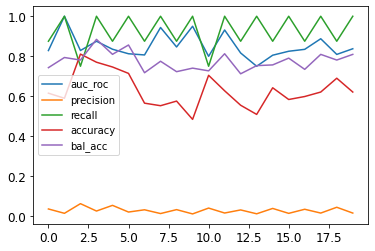

In [ ]:
plt.plot(range(len(test_roc)),test_roc,label='auc_roc')
plt.plot(range(len(test_precision)),test_precision,label='precision')
plt.plot(range(len(test_recall)),test_recall,label='recall')
plt.plot(range(len(test_acc)),test_acc,label='accuracy')
plt.plot(range(len(test_bal_acc)),test_bal_acc,label='bal_acc')
plt.legend()
plt.show()

# Active learning

## Sample 

Regard the diversity_3500 as the full dataset.

In [ ]:
class mymodel():
    def __init__(self,response_cols='VAUE_NUM_MEAN',prediction_type='regression',splitter='scaffold',model_type='NN',\
              featurizer='graphconv',dtype='graphconv',lr=0.001057,layer_sizes='64,64,32',dropouts='0.4,0.4,0.4',\
              valid_frac=0.15,test_frac=0.05,epochs=50):
        self.response_cols=[response_cols]
        self.splitter=splitter
        self.model_type=model_type
        self.prediction_type=prediction_type
        self.featurizer=featurizer
        self.dtype=dtype
        self.lr=lr
        self.layer_sizes=layer_sizes
        self.dropouts=dropouts
        self.epochs=epochs
        self.valid_frac=valid_frac
        self.test_frac=test_frac

    def fit(self,dataset_key,result_dir):
        params1={"datastore": "False",
        "save_results": "False",
        "splitter": self.splitter,
        "id_col": 'compound_id',
        "smiles_col": 'rdkit_smiles',
        "response_cols": self.response_cols,
        "system": "LC",
        "transformers": "True",
        "model_type": self.model_type,
        "prediction_type": self.prediction_type,
        "featurizer": self.featurizer,
        "descriptor_type": self.dtype,
        "learning_rate": self.lr,
        "layer_sizes": self.layer_sizes,
        "dropouts" : self.dropouts,
        "save_results": "False",
        "max_epochs": self.epochs,
        "verbose": "True",
        "split_valid_frac": self.valid_frac,
        "split_test_frac": self.test_frac,
        "result_dir": result_dir,
        "dataset_key": dataset_key}
        tp1 = parse.wrapper(params1)
        NN1 = mp.ModelPipeline(tp1)
        NN1.train_model()

In [ ]:
from sklearn.pipeline import pipeline

## Round 1

### Load Full data

In [ ]:
from rdkit import rdBase, Chem, DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors, PandasTools
import pandas as pd

In [ ]:
#Load full data
#Fulldata = PandasTools.LoadSDF('NExT_Diversity_Library.sdf')
#Fulldata = Fulldata[['COMPOUND_ID', 'SMILES']]
#Fulldata.columns=['ID','smiles']

In [ ]:
#Fulldata=pd.read_csv('NExT_Diversity_smiles.csv',header=0)
Fulldata = pd.read_csv('scores5w.txt',sep=' ',header=None)
Fulldata.columns=['compound_id','smiles','score']
Fulldata['rdkit_smiles'] = Fulldata['smiles'].apply(curate_data.base_smiles_from_smiles)
Fulldata = curate(Fulldata)

Bad duplicates removed from dataset
Dataframe size (53776, 8)
List of 'bad' duplicates removed
        compound_id  score  VALUE_NUM_mean   Perc_Var  VALUE_NUM_std
37523  CPD002444167 -0.844         -3.3245 -74.612724       3.507957
45256  CPD002498747 -5.805         -3.3245 -74.612724       3.507957

Dataset de-duplicated
Dataframe size (53775, 8)
New column created with averaged values:  VALUE_NUM_mean


In [ ]:
Fulldata = Fulldata.drop(np.where(Fulldata.applymap(lambda x: x == ''))[0][0])

### Train

In [ ]:
sample_df=Fulldata.sample(n=3500,replace=False,random_state=123)

In [ ]:
sample_df.to_csv('sample_3500.csv')

In [ ]:
response_cols = ['VALUE_NUM_mean']
dataset_key = 'sample_3500.csv'
params1={"datastore": "False",
        "save_results": "False",
        "splitter": "scaffold",
        "id_col": 'compound_id',
        "smiles_col": 'rdkit_smiles',
        "response_cols": response_cols,
        "system": "LC",
        "transformers": "True",
        "model_type": "NN",
        "prediction_type": "regression",
        "featurizer": "graphconv",
        "descriptor_type": "graphconv",
        "learning_rate": "0.001057",
        "layer_sizes": "64,64,32",
        "dropouts" : "0.4,0.4,0.4",
        "save_results": "False",
        "max_epochs": "50",
        "verbose": "True",
        "split_valid_frac": 0.15,
        "split_test_frac": 0.15,
        "result_dir": 'drive/MyDrive/Colab Notebooks',
        "dataset_key": dataset_key}
tp1 = parse.wrapper(params1)
NN1 = mp.ModelPipeline(tp1)
NN1.train_model()

INFO:ATOM:Created a dataset hash '96da7244b54bc6fc2824a6f0c4590d5c' from dataset_key '/content/drive/MyDrive/Colab Notebooks/sample_3500.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset sample_3500, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/sample_3500/NN_graphconv_scaffold_regression/02e285e5-11e2-4448-8ede-3a26dcaeb82d/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is -0.272
INFO:ATOM:Epoch 0: training r2_score = -0.306, validation r2_score = -0.272, test r2_score = -0.403
INFO:ATOM:*** Total score for epoch 1 is -0.176, is new maximum
INFO:ATOM:Epoch 1: training r2_score = -0.110, validation r2_score = -0.176, test r2_score = -0.164
INFO:ATOM:Epoch 2: training r2_score = -0.176, validation r2_score = -0.265, test r2_score = -0.212
INFO:ATOM:*** Total score for epoch 3 is -0.16, is new maximum
INFO:ATOM:Epoch 3: training r2_score = -0.078, validation r2_score = -0.160, test r2_score = -0.107
INFO:ATOM:*** Total score for epoch 4 is -0.0703, is new maximum
INFO:ATOM:Epoch 4: training r2_score = 0.010, validation r2_score = -0.070, test r2_score = 

### Prediction

In [ ]:
result1 = NN1.predict_on_dataframe(Fulldata, contains_responses=True)

INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000
INFO:ATOM:Featurizing sample 9000
INFO:ATOM:Featurizing sample 10000
INFO:ATOM:Featurizing sample 11000
INFO:ATOM:Featurizing sample 12000
INFO:ATOM:Featurizing sample 13000
INFO:ATOM:Featurizing sample 14000
INFO:ATOM:Featurizing sample 15000
INFO:ATOM:Featurizing sample 16000
INFO:ATOM:Featurizing sample 17000
INFO:ATOM:Featurizing sample 18000
INFO:ATOM:Featurizing sample 19000
INFO:ATOM:Featurizing sample 20000
INFO:ATOM:Featurizing sample 21000
INFO:ATOM:Featurizing sample 22000
INFO:ATOM:Featurizing sample 23000
INFO:ATOM:Featurizing sample 24000
INFO:ATOM:Featurizing sample 25000
INFO:ATOM:Featurizing sample 26000
INFO:ATOM:Featurizing sample 27000
INFO:ATOM:Featurizing sample 2800

In [ ]:
result1.head()

,compound_id,rdkit_smiles,actual,pred
0,CPD000001229,Cc1c(C(=O)O)c2cc(O)ccc2n1-c1ccccc1,-4.453,-4.461694
1,CPD000592703,COc1ccccc1CNC(=O)Cc1c[nH]c2ccccc12,-3.370,-4.762062
2,CPD002367207,CCOc1ccc(CNS(=O)(=O)c2ccc(-c3ccc(=O)[nH]n3)o2)cc1,-3.803,-4.968958
3,CPD002376236,CCOc1ccc(NC(=O)c2ccc(C)cc2)c2cccnc12,-3.623,-4.737351
4,CPD001632507,CCCn1cc(SCC(=O)Nc2ccc(C)cc2)c2ccccc21,-5.955,-4.605568


In [ ]:
#next round data
result1=result1.sort_values(by=['pred'],ascending=True)
round1=result1.iloc[:3500,:]
round1.head()

,compound_id,rdkit_smiles,actual,pred
27570,CPD002485270,O=C1CC(c2ccc3c(c2)OCO3)c2cnn(Cc3ccc4c(c3)OCO4)...,-4.137,-6.334995
15250,CPD002406105,O=C(CNC(=O)c1ccc2c(c1)OCO2)Nc1ccc2c(c1)Cc1cccc...,-3.559,-6.306253
33412,CPD002434619,O=C(Nc1ccc2c(c1)Cc1ccccc1-2)c1ccc2c(c1)OCCO2,-4.241,-6.305192
27182,CPD002454633,O=C(Nc1ccc2oc(-c3cccc4ccccc34)nc2c1)c1ccc2c(c1...,-8.198,-6.272368
25970,CPD002485046,O=C(Nc1ccc2c(c1)C(=O)c1ccccc1-2)c1ccc2c(c1)OCO2,-3.378,-6.237654


In [ ]:
#round1.to_csv('round1.csv')

### Evaluate

In [ ]:
def myevaluate(df,p=0.04,n=0):
  y_true=df['actual']
  y_pred=df['pred']
  if n==0:
    y_true=active(y_true,percentage=p)
    y_pred=active(y_pred,percentage=p)
  else:
    y_true=active(y_true,n=n)
    y_pred=active(y_pred,n=n)
  results={}
  results['accuracy']=metrics.accuracy_score(y_true, y_pred)
  results['precision']=metrics.precision_score(y_true, y_pred)
  results['recall']=metrics.recall_score(y_true, y_pred)
  results['f1_score']=metrics.f1_score(y_true, y_pred)
  results['auc_roc']=metrics.roc_auc_score(y_true, y_pred)
  return results
myevaluate(result1,n=3500)

{'accuracy': 0.8910625953062818,
 'precision': 0.16285714285714287,
 'recall': 0.16295025728987994,
 'f1_score': 0.1629036867676479,
 'auc_roc': 0.5523359767633266}

## Round 2

### Merge

In [ ]:
df=sample_df[['compound_id','rdkit_smiles','score']]
round1_data=round1.rename(columns={'actual':'score'})
round1_data=round1_data[['compound_id','rdkit_smiles','score']]

In [ ]:
train2 = pd.concat([df, round1_data], ignore_index=True)
train2['compound_id']=train2['compound_id'].astype(str)
train2.shape

(7000, 3)

In [ ]:
train2=curate(train2)

Bad duplicates removed from dataset
Dataframe size (7000, 7)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (6778, 7)
New column created with averaged values:  VALUE_NUM_mean


In [ ]:
#train2=train2.drop_duplicates(subset='compound_id',keep='first')

In [ ]:
train2.to_csv('train2_data.csv')

### Train

In [ ]:
response_cols = ['VALUE_NUM_mean']
dataset_key = 'train2_data.csv'
params2={"datastore": "False",
        "save_results": "False",
        "splitter": "scaffold",
        "id_col": 'compound_id',
        "smiles_col": 'rdkit_smiles',
        "response_cols": response_cols,
        "system": "LC",
        "transformers": "True",
        "model_type": "NN",
        "prediction_type": "regression",
        "featurizer": "graphconv",
        "descriptor_type": "graphconv",
        "learning_rate": "0.001057",
        "layer_sizes": "64,64,32",
        "dropouts" : "0.4,0.4,0.4",
        "save_results": "False",
        "max_epochs": "50",
        "verbose": "True",
        "split_valid_frac": 0.15,
        "split_test_frac": 0.15,
        "result_dir": 'drive/MyDrive/Colab Notebooks',
        "dataset_key": dataset_key}
tp2 = parse.wrapper(params2)
NN2 = mp.ModelPipeline(tp2)
NN2.train_model()

INFO:ATOM:Created a dataset hash 'ded5d3ab8cb9efd9962e378d0419a5cc' from dataset_key '/content/drive/MyDrive/Colab Notebooks/train2_data.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset train2_data, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/train2_data/NN_graphconv_scaffold_regression/f079d089-0e40-4faa-91d5-594a5618e189/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is -0.403
INFO:ATOM:Epoch 0: training r2_score = -0.099, validation r2_score = -0.403, test r2_score = -0.475
INFO:ATOM:*** Total score for epoch 1 is -0.0613, is new maximum
INFO:ATOM:Epoch 1: training r2_score = 0.044, validation r2_score = -0.061, test r2_score = -0.043
INFO:ATOM:*** Total score for epoch 2 is -0.0321, is new maximum
INFO:ATOM:Epoch 2: training r2_score = -0.011, validation r2_score = -0.032, test r2_score = 0.029
INFO:ATOM:*** Total score for epoch 3 is 0.0138, is new maximum
INFO:ATOM:Epoch 3: training r2_score = 0.041, validation r2_score = 0.014, test r2_score = 0.061
INFO:ATOM:*** Total score for epoch 4 is 0.0239, is new maximum
INFO:ATOM:Epoch 4: training r2_

### Prediction

In [ ]:
result2 = NN2.predict_on_dataframe(Fulldata, contains_responses=True)

INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000
INFO:ATOM:Featurizing sample 9000
INFO:ATOM:Featurizing sample 10000
INFO:ATOM:Featurizing sample 11000
INFO:ATOM:Featurizing sample 12000
INFO:ATOM:Featurizing sample 13000
INFO:ATOM:Featurizing sample 14000
INFO:ATOM:Featurizing sample 15000
INFO:ATOM:Featurizing sample 16000
INFO:ATOM:Featurizing sample 17000
INFO:ATOM:Featurizing sample 18000
INFO:ATOM:Featurizing sample 19000
INFO:ATOM:Featurizing sample 20000
INFO:ATOM:Featurizing sample 21000
INFO:ATOM:Featurizing sample 22000
INFO:ATOM:Featurizing sample 23000
INFO:ATOM:Featurizing sample 24000
INFO:ATOM:Featurizing sample 25000
INFO:ATOM:Featurizing sample 26000
INFO:ATOM:Featurizing sample 27000
INFO:ATOM:Featurizing sample 2800

number of features: 75


INFO:ATOM:Transforming response data
INFO:ATOM:Predicting values for current model


In [ ]:
#next round data
result2=result2.sort_values(by=['pred'],ascending=True)
round2=result2.iloc[:3500,:]
round2.head()

,compound_id,rdkit_smiles,actual,pred
11356,CPD002398509,CC(NC(=O)c1cccc(S(=O)(=O)Nc2ccc3c(c2)OCO3)c1)c...,-8.059,-7.816522
25880,CPD002412769,O=S(=O)(Cc1ccc2c(c1)OCO2)c1ccc2ccccc2c1,-6.739,-7.779991
36953,CPD000067107,O=C(CN1C(=O)NC2(CCOc3ccccc32)C1=O)Nc1ccc2c(c1)...,-6.167,-7.744978
50744,CPD001244737,CC(NC(=O)CN1C(=O)NC2(CCc3ccccc32)C1=O)c1ccc2c(...,-7.711,-7.743709
11876,CPD002396166,O=C(NCC(=O)N1CCN(S(=O)(=O)c2ccc3c(c2)OCCO3)CC1...,-5.344,-7.673383


### Evaluate

In [ ]:
myevaluate(result2,n=3500)

{'accuracy': 0.901662513482352,
 'precision': 0.24428571428571427,
 'recall': 0.2444253859348199,
 'f1_score': 0.24435553015147182,
 'auc_roc': 0.5959078954497078}

## Round 3

#### Merge

In [ ]:
df=train2[['compound_id','rdkit_smiles','score']]
round2_data=round2.rename(columns={'actual':'score'})
round2_data=round2_data[['compound_id','rdkit_smiles','score']]

In [ ]:
train3 = pd.concat([df, round2_data], ignore_index=True)
train3['compound_id']=train3['compound_id'].astype(str)
train3.shape

(10278, 3)

In [ ]:
train3=curate(train3)

Bad duplicates removed from dataset
Dataframe size (10278, 7)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (8689, 7)
New column created with averaged values:  VALUE_NUM_mean


In [ ]:
train3.to_csv('train3_data.csv')

#### Train

In [ ]:
response_cols = ['VALUE_NUM_mean']
dataset_key = 'train3_data.csv'
params3={"datastore": "False",
        "save_results": "False",
        "splitter": "scaffold",
        "id_col": 'compound_id',
        "smiles_col": 'rdkit_smiles',
        "response_cols": response_cols,
        "system": "LC",
        "transformers": "True",
        "model_type": "NN",
        "prediction_type": "regression",
        "featurizer": "graphconv",
        "descriptor_type": "graphconv",
        "learning_rate": "0.001057",
        "layer_sizes": "64,64,32",
        "dropouts" : "0.4,0.4,0.4",
        "save_results": "False",
        "max_epochs": "50",
        "verbose": "True",
        "split_valid_frac": 0.15,
        "split_test_frac": 0.15,
        "result_dir": 'drive/MyDrive/Colab Notebooks',
        "dataset_key": dataset_key}
tp3 = parse.wrapper(params3)
NN3 = mp.ModelPipeline(tp3)
NN3.train_model()

INFO:ATOM:Created a dataset hash '4c070108b698ccee9c4109d1d1935377' from dataset_key '/content/drive/MyDrive/Colab Notebooks/train3_data.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset train3_data, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/train3_data/NN_graphconv_scaffold_regression/4e19b72e-a550-4c6d-a2a3-9a71d9a5ba56/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is -0.113
INFO:ATOM:Epoch 0: training r2_score = -0.072, validation r2_score = -0.113, test r2_score = -0.341
INFO:ATOM:Epoch 1: training r2_score = -0.341, validation r2_score = -0.376, test r2_score = -0.781
INFO:ATOM:Epoch 2: training r2_score = -0.076, validation r2_score = -0.149, test r2_score = -0.447
INFO:ATOM:*** Total score for epoch 3 is -0.0331, is new maximum
INFO:ATOM:Epoch 3: training r2_score = 0.027, validation r2_score = -0.033, test r2_score = -0.256
INFO:ATOM:Epoch 4: training r2_score = 0.020, validation r2_score = -0.045, test r2_score = -0.290
INFO:ATOM:*** Total score for epoch 5 is 0.0486, is new maximum
INFO:ATOM:Epoch 5: training r2_score = 0.075, validation 

#### Prediction

In [ ]:
result3 = NN3.predict_on_dataframe(Fulldata, contains_responses=True)

INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000
INFO:ATOM:Featurizing sample 9000
INFO:ATOM:Featurizing sample 10000
INFO:ATOM:Featurizing sample 11000
INFO:ATOM:Featurizing sample 12000
INFO:ATOM:Featurizing sample 13000
INFO:ATOM:Featurizing sample 14000
INFO:ATOM:Featurizing sample 15000
INFO:ATOM:Featurizing sample 16000
INFO:ATOM:Featurizing sample 17000
INFO:ATOM:Featurizing sample 18000
INFO:ATOM:Featurizing sample 19000
INFO:ATOM:Featurizing sample 20000
INFO:ATOM:Featurizing sample 21000
INFO:ATOM:Featurizing sample 22000
INFO:ATOM:Featurizing sample 23000
INFO:ATOM:Featurizing sample 24000
INFO:ATOM:Featurizing sample 25000
INFO:ATOM:Featurizing sample 26000
INFO:ATOM:Featurizing sample 27000
INFO:ATOM:Featurizing sample 2800

number of features: 75


INFO:ATOM:Transforming response data
INFO:ATOM:Predicting values for current model


In [ ]:
#next round data
result3=result3.sort_values(by=['pred'],ascending=True)
round3=result3.iloc[:3500,:]
round3.head()

,compound_id,rdkit_smiles,actual,pred
50932,CPD000652393,Cc1coc2c(C)c3oc(=O)c(CC(=O)N4C[C@H]5C[C@@H](C4...,-7.734,-8.041435
51115,CPD000652622,Cc1coc2c(C)c3oc(=O)c(CCC(=O)N4C[C@H]5C[C@@H](C...,-8.583,-8.028742
51650,CPD000653313,Cc1c(C)c2ccc(OC(C)C(=O)N3C[C@H]4C[C@@H](C3)c3c...,-8.802,-8.016171
51419,CPD000653061,Cc1c(C)c2ccc(OCC(=O)N3C[C@H]4C[C@@H](C3)c3cccc...,-8.212,-8.014651
50939,CPD000652396,Cc1cc(=O)oc2c(C)c(OCC(=O)N3C[C@H]4C[C@@H](C3)c...,-6.208,-7.962883


### Evaluate

In [ ]:
myevaluate(result3,n=3500)

{'accuracy': 0.9108491092349462,
 'precision': 0.31485714285714284,
 'recall': 0.31503716409376786,
 'f1_score': 0.314947127750786,
 'auc_roc': 0.6336702249779047}

Compare the result of each round:

In [ ]:
# round 1
myevaluate(result1,p=0.1)

{'accuracy': 0.8433629635139659,
 'precision': 0.21666356704482054,
 'recall': 0.21670386904761904,
 'f1_score': 0.216683716172231,
 'auc_roc': 0.5648377397223714}

In [ ]:
# round 2
myevaluate(result2,p=0.1)

{'accuracy': 0.8578309220069178,
 'precision': 0.2890087409336061,
 'recall': 0.2890625,
 'f1_score': 0.28903561796707894,
 'auc_roc': 0.6050358163043927}

In [ ]:
# round 3
myevaluate(result3,p=0.1)

{'accuracy': 0.873898166400119,
 'precision': 0.3693509391854194,
 'recall': 0.36941964285714285,
 'f1_score': 0.369385287826653,
 'auc_roc': 0.6496773820715731}

## More rounds

In [ ]:
def merge(train_df,round_df):
  df=train_df[['compound_id','rdkit_smiles','score']]
  round_data=round_df.rename(columns={'actual':'score'})
  round_data=round_data[['compound_id','rdkit_smiles','score']]
  newtrain = pd.concat([df, round_data], ignore_index=True)
  newtrain['compound_id']=newtrain['compound_id'].astype(str)
  newtrain=curate(newtrain)
  return newtrain

In [ ]:
def fit(dataset_key):
  response_cols = ['VALUE_NUM_mean']
  params={"datastore": "False",
        "save_results": "False",
        "splitter": "scaffold",
        "id_col": 'compound_id',
        "smiles_col": 'rdkit_smiles',
        "response_cols": response_cols,
        "system": "LC",
        "transformers": "True",
        "model_type": "NN",
        "prediction_type": "regression",
        "featurizer": "graphconv",
        "descriptor_type": "graphconv",
        "learning_rate": "0.001057",
        "layer_sizes": "64,64,32",
        "dropouts" : "0.4,0.4,0.4",
        "save_results": "False",
        "max_epochs": "50",
        "verbose": "True",
        "split_valid_frac": 0.15,
        "split_test_frac": 0.15,
        "result_dir": 'drive/MyDrive/Colab Notebooks',
        "dataset_key": dataset_key}
  tp = parse.wrapper(params)
  NN = mp.ModelPipeline(tp)
  NN.train_model()
  return NN

In [ ]:
del NN1,NN2,result1,result2

In [ ]:
train,round=train3,round3

In [ ]:
train=merge(train,round)
train.to_csv('next_train_data.csv')
NN=fit('next_train_data.csv')
result=NN.predict_on_dataframe(Fulldata, contains_responses=True)
result=result.sort_values(by=['pred'],ascending=True)
round=result.iloc[:3500,:]
eval=myevaluate(result,n=3500)

INFO:ATOM:Created a dataset hash 'ecc40688b0308f0924cd83726dcd62ec' from dataset_key '/content/drive/MyDrive/Colab Notebooks/next_train_data.csv'
DEBUG:ATOM:Attempting to load featurized dataset


Bad duplicates removed from dataset
Dataframe size (12189, 7)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (10184, 7)
New column created with averaged values:  VALUE_NUM_mean


DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset next_train_data, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000
INFO:ATOM:Featurizing sample 9000
INFO:ATOM:Featurizing sample 10000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/next_train_data/NN_graphconv_scaffold_regression/b7dff882-0461-4fa0-8026-a3198c434bda/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is -0.662
INFO:ATOM:Epoch 0: training r2_score = -0.600, validation r2_score = -0.662, test r2_score = -1.493
INFO:ATOM:*** Total score for epoch 1 is -0.187, is new maximum
INFO:ATOM:Epoch 1: training r2_score = -0.087, validation r2_score = -0.187, test r2_score = -0.719
INFO:ATOM:*** Total score for epoch 2 is -0.125, is new maximum
INFO:ATOM:Epoch 2: training r2_score = -0.015, validation r2_score = -0.125, test r2_score = -0.467
INFO:ATOM:*** Total score for epoch 3 is -0.0831, is new maximum
INFO:ATOM:Epoch 3: training r2_score = 0.012, validation r2_score = -0.083, test r2_score = -0.419
INFO:ATOM:*** Total score for epoch 4 is -0.00877, is new maximum
INFO:ATOM:Epoch 4: tra

number of features: 75


INFO:ATOM:Transforming response data
INFO:ATOM:Predicting values for current model


In [ ]:
eval

{'accuracy': 0.9124483951351955,
 'precision': 0.3271428571428571,
 'recall': 0.3273299028016009,
 'f1_score': 0.3272363532437839,
 'auc_roc': 0.6402442337621657}

In [ ]:
train=merge(train,round)
train.to_csv('next_train_data.csv')
NN=fit('next_train_data.csv')
result=NN.predict_on_dataframe(Fulldata, contains_responses=True)
result=result.sort_values(by=['pred'],ascending=True)
round=result.iloc[:3500,:]
eval=myevaluate(result,n=3500)

INFO:ATOM:Created a dataset hash '3c563a4bd64e752e099b11445cb3dc99' from dataset_key '/content/drive/MyDrive/Colab Notebooks/next_train_data.csv'


Bad duplicates removed from dataset
Dataframe size (13684, 7)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (11035, 7)
New column created with averaged values:  VALUE_NUM_mean


DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset next_train_data, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000
INFO:ATOM:Featurizing sample 9000
INFO:ATOM:Featurizing sample 10000
INFO:ATOM:Featurizing sample 11000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/next_train_data/NN_graphconv_scaffold_regression/7ae798da-8f56-4033-b568-a336346a0d49/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is -0.372
INFO:ATOM:Epoch 0: training r2_score = -0.190, validation r2_score = -0.372, test r2_score = -1.330
INFO:ATOM:*** Total score for epoch 1 is -0.247, is new maximum
INFO:ATOM:Epoch 1: training r2_score = -0.077, validation r2_score = -0.247, test r2_score = -0.849
INFO:ATOM:*** Total score for epoch 2 is -0.116, is new maximum
INFO:ATOM:Epoch 2: training r2_score = 0.015, validation r2_score = -0.116, test r2_score = -0.629
INFO:ATOM:*** Total score for epoch 3 is 0.00387, is new maximum
INFO:ATOM:Epoch 3: training r2_score = 0.064, validation r2_score = 0.004, test r2_score = -0.300
INFO:ATOM:Epoch 4: training r2_score = 0.061, validation r2_score = -0.109, test r2_score 